https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/

### 1-D Linear Convection

In [322]:
# Remember: comments in python are denoted by the pound sign
import numpy                       #here we load numpy
from matplotlib import pyplot      #here we load matplotlib
import time, sys                   #and load some utilities

In [323]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline

In [324]:
nx = 20   #try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 55    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

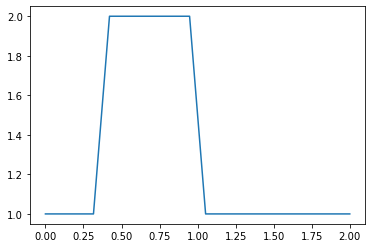

In [325]:
u = numpy.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
pyplot.plot(numpy.linspace(0, 2, nx), u)

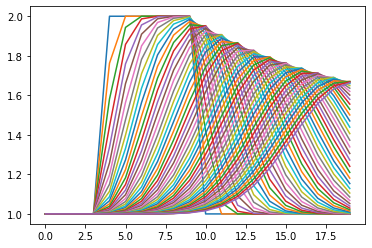

In [326]:
u = numpy.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
un = numpy.ones(nx) #initialize a temporary array
tmp = []

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    pyplot.plot(un)
    for i in range(1, nx): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        #print(un[i] - un[i-1])
        tmp.append(un[i] - un[i-1])

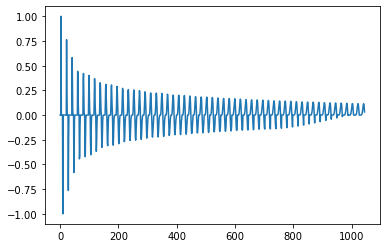

In [327]:
pyplot.plot(tmp);

### Nonlinear Convection

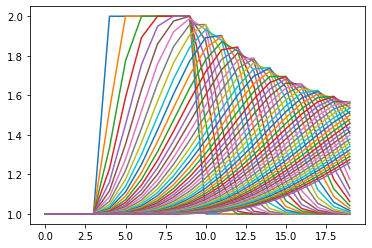

In [328]:
u = numpy.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
un = numpy.ones(nx) #initialize a temporary array
tmp = []

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    pyplot.plot(un)
    for i in range(1, nx): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
        #print(un[i])
        tmp.append(un[i] - un[i-1])

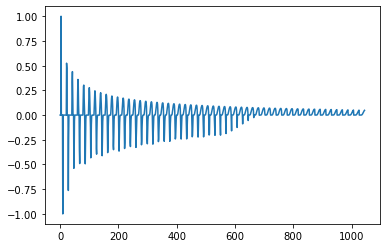

In [329]:
pyplot.plot(tmp);

### Diffusion Equation in 1-D

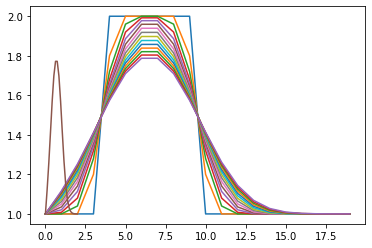

In [330]:
nx = 20
dx = 2 / (nx - 1)
nt = 15    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!


u = numpy.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #our placeholder array, un, to advance the solution in time

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    pyplot.plot(un)
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        
pyplot.plot(numpy.linspace(0, 2, nx), u);

### Burgers' Equation

In [331]:
import sympy

In [332]:
from sympy import init_printing
init_printing(use_latex=True)

In [333]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

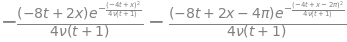

In [334]:
phiprime = phi.diff(x)
phiprime

In [335]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [336]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [337]:
ufunc = lambdify((t, x, nu), u)
print(ufunc(1, 4, 3))

3.49170664206445


In [338]:
###variable declarations
nx = 101
nt = 100
dx = 2 * numpy.pi / (nx - 1)
nu = .07
dt = dx * nu

x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0

u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

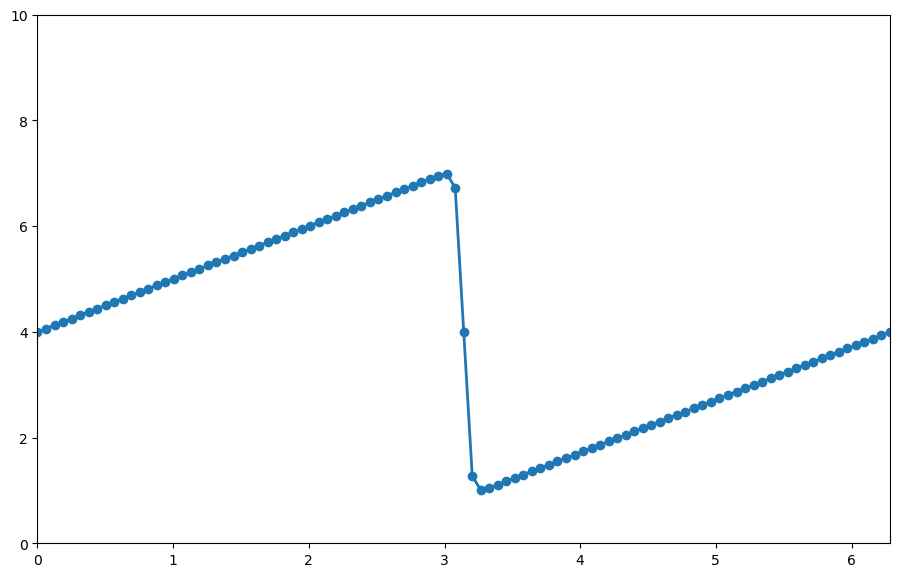

In [339]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2)
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10]);

In [340]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = numpy.asarray([ufunc(nt * dt, xi, nu) for xi in x])

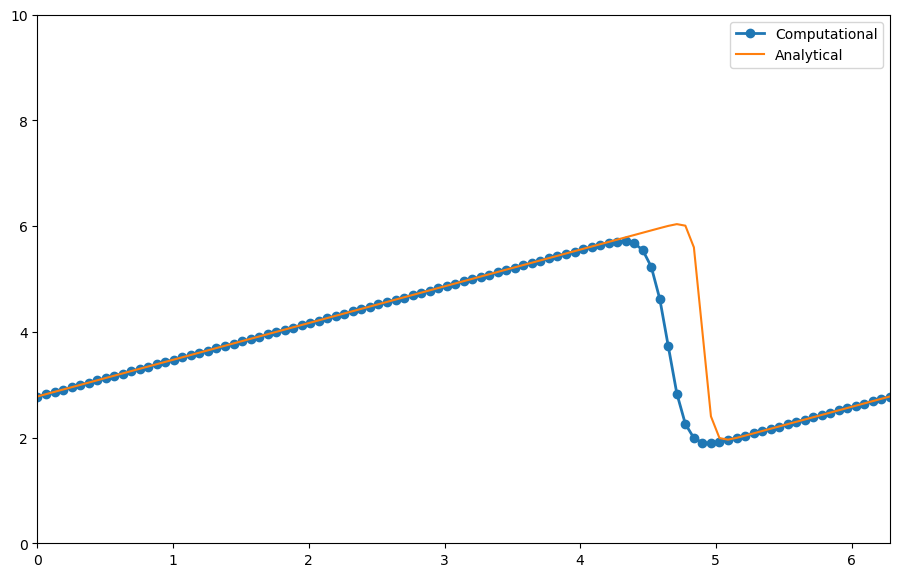

In [341]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])
pyplot.legend();